In [3]:
%matplotlib inline
import pandas as pd
import seaborn as sbn
sbn.set()

In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


In [6]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

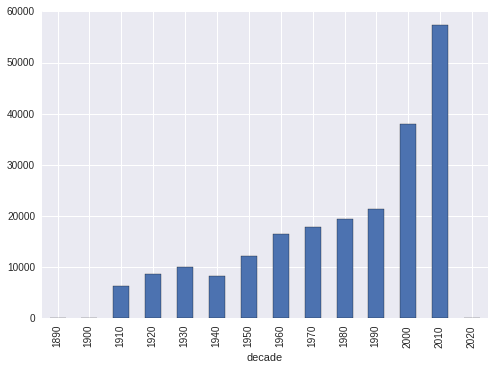

In [10]:
titles['decade'] = titles.year // 10 * 10
titles.groupby('decade').size().plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

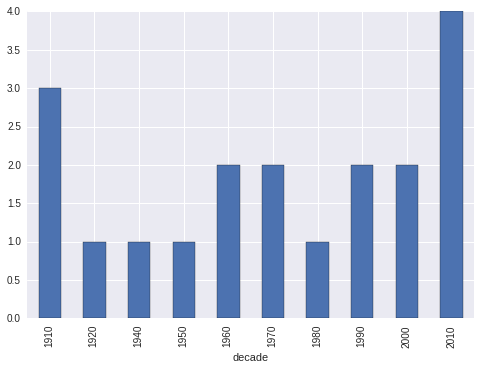

In [11]:
titles[titles.title=='Hamlet'].groupby('decade').size().sort_index().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [14]:
cast[(cast.year//10==195)&(cast.n==1)].groupby(['year','type']).type.value_counts()

year  type            
1950  actor    actor      604
      actress  actress    271
1951  actor    actor      633
      actress  actress    272
1952  actor    actor      591
      actress  actress    284
1953  actor    actor      634
      actress  actress    291
1954  actor    actor      626
      actress  actress    298
1955  actor    actor      606
      actress  actress    264
1956  actor    actor      614
      actress  actress    287
1957  actor    actor      708
      actress  actress    284
1958  actor    actor      695
      actress  actress    275
1959  actor    actor      678
      actress  actress    287
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [41]:
cast[(cast.year//10==195)&(cast.n<=5)].groupby(['n','type']).type.value_counts()

n  type            
1  actor    actor      6389
   actress  actress    2813
2  actor    actor      4382
   actress  actress    4405
3  actor    actor      5409
   actress  actress    3022
4  actor    actor      5411
   actress  actress    2746
5  actor    actor      5435
   actress  actress    2447
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [23]:
cast[cast.title.str.contains('Pink Panther')].groupby('year').size()

year
1963    19
1975    30
1976    73
1978    64
1982    40
1983    67
1993    46
2006    89
2009    82
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [39]:
cast[cast.name=='Frank Oz'].groupby(['title','year']).size()>1

title                                           year
An American Werewolf in London                  1981     True
Blues Brothers 2000                             1998    False
Innocent Blood                                  1992    False
Inside Out                                      2015    False
Labyrinth                                       1986    False
Monsters, Inc.                                  2001    False
Muppet Treasure Island                          1996     True
Muppets from Space                              1999     True
Sesame Street Presents: Follow that Bird        1985     True
Spies Like Us                                   1985    False
Star Wars: Episode I - The Phantom Menace       1999    False
Star Wars: Episode II - Attack of the Clones    2002    False
Star Wars: Episode III - Revenge of the Sith    2005    False
Star Wars: Episode V - The Empire Strikes Back  1980    False
Star Wars: Episode VI - Return of the Jedi      1983    False
Superman III     

### List each of the characters that Frank Oz has portrayed at least twice.

In [63]:
cast[cast.name=='Frank Oz'].groupby('character').size()>2

character
Animal                                                   True
Aughra, a Keeper Of Secrets (performer)                 False
Bert                                                     True
Brain Surgeon                                           False
Chamberlain (performer)                                 False
Cookie Monster                                           True
Corrections Officer                                     False
Corrupt Cop                                             False
Doc Hopper's Men                                        False
Fozzie                                                  False
Fozzie Bear                                              True
Fozzie Bear as Fozziewig                                False
Fungus                                                  False
George the Janitor                                      False
Gramps                                                  False
Grover                                                  Fals